In [ ]:
# Installing required packages
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=e835ba58ae591a6617fe33011f0f57469461ced50f0ac0253a287f1f0bf76917
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

## Load Data

In [ ]:
spark = SparkSession \
    .builder \
    .appName("clustering") \
    .getOrCreate()

In [ ]:
sqlContext = SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# file='/content/drive/My Drive/spotify/spotify-data.csv'
file = '../csv_data/spotify-data.csv'

df = sqlContext.read.load(file,
                          format='com.databricks.spark.csv',
                          header='true',inferSchema='true')

Mounted at /content/drive


In [ ]:
df.show(5)

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|6KbQ3uYMLKb5jDxLF...|Singende Bataillo...| ['Carl Woitschach']|     158648|        1928|1928|       0.995|       0.708| 0.195|           0.563|   0.151| -12.428|     0.0506|118.469|  0.779|   1| 10|         0|       0|
|6KuQTIu1KoTTkLXKr...|Fantasiestücke, O...|['Robert Schumann...|     282133|        1928|1928|       0.994|       0.379|

In [ ]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- year: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- key: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- explicit: string (nullable = true)



In [ ]:
from pyspark.sql.types import DoubleType, IntegerType

toCastedCol = ["duration_ms", 'year', "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key", "popularity", "explicit"]
for col in toCastedCol:
  df = df.withColumn(col, df[col].cast(DoubleType()))

df = df.withColumn("year", df["year"].cast(IntegerType()))

In [ ]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- release_date: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- key: double (nullable = true)
 |-- popularity: double (nullable = true)
 |-- explicit: double (nullable = true)



In [ ]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
id,169909,None,None,000G1xMMuwxNHmwVsBdtj1,7zzuPsjj9L3M7ikqGmjN0D
name,169909,Infinity,NaN,Cello Song,화려하지 않은 고백 Confession Is Not Flashy
artists,169909,None,None,"""""Cool"""" (Allegretto)""",['黑豹']
duration_ms,168462,231288.1418480132,120689.89773374033,5108.0,5403500.0
release_date,169909,6193.66778670272,42244.432826254044,"""""'Legally Blonde' Ensemble""""]""","['Wolfgang Amadeus Mozart', 'Walter Franck', '..."
year,169217,2364.329204512549,10908.368278422011,1921,710400
acousticness,169624,197.1645370254867,7127.883283076293,0.0,706400.0
danceability,169771,111.97785567892646,5511.097855467201,0.0,668333.0
energy,169839,70.88351548936592,4321.7813953980385,0.0,503320.0


In [ ]:
df = df.na.drop()
df = df.dropDuplicates(["name"])

## features column

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
featuresUsed = ['duration_ms', 'acousticness', 'danceability', 'energy',
                'instrumentalness', 'liveness', 'loudness', 'speechiness',
                'tempo', 'valence', 'mode', 'key', 'explicit', 'artists_index']

# Index artists
indexer = StringIndexer(inputCol="artists", outputCol="artists_index")
indexer.setHandleInvalid("keep")
# indexed_df = indexer.fit(df).transform(df)

# Assemble feature vector
assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features")
assembler.setHandleInvalid("keep")
# assembled = assembler.transform(indexed_df)

VectorAssembler_fd16d3f7d413

## data scaling


In [ ]:
from pyspark.ml.feature import StandardScaler

stdScaler = StandardScaler(inputCol="features", outputCol="features_std", withStd=True, withMean=True)
# stdScalerModel = stdScaler.fit(assembled)
# stdScaledData = stdScalerModel.transform(assembled)

## Linear Regression

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
(trainingData, testData) = df.randomSplit([0.8,0.2], seed = 13234 )

In [ ]:
trainingData.count(),testData.count()

(105445, 26208)

In [ ]:
linear = LinearRegression(featuresCol = 'features_std', labelCol='popularity')

## Classification

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
df_binary_popular = df.withColumn("binary_popularity", (df.popularity > 50).cast("double"))

In [ ]:
logistic = LogisticRegression(featuresCol="features_std", labelCol="binary_popularity")

In [ ]:
(logistcTrainingData, logisticTestData) = df_binary_popular.randomSplit([0.8,0.2], seed = 13234 )

## Pipeline

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
asmPipeline = Pipeline(stages=[indexer, assembler])
stdPipeline = Pipeline(stages=[indexer, assembler, stdScaler])
regPipeline = Pipeline(stages=[indexer, assembler, stdScaler, linear])
logisticPipeline = Pipeline(stages=[indexer, assembler, stdScaler, logistic])

In [ ]:
assembled = asmPipeline.fit(df).transform(df)
stdScalerModel = stdPipeline.fit(df)
stdScaledData = stdScalerModel.transform(df)

In [ ]:
linearModel = regPipeline.fit(trainingData)
linearPrediction = linearModel.transform(testData)

In [ ]:
logisticModel = logisticPipeline.fit(logistcTrainingData)
logisticPrediction = logisticModel.transform(logisticTestData)

## Evaluation

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
linearPrediction.show()

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+----+----------+--------+-------------+--------------------+--------------------+--------------------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode| key|popularity|explicit|artists_index|            features|        features_std|          prediction|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+----+----------+--------+-------------+--------------------+--------------------+--------------------+
|00U1MDChdOTxWwtKo...| Stay (I Missed You)|       ['Lisa Loeb']|   184333.0|     5/17/94|1994|       0.462

In [ ]:
print("Coefficients: %s" % str(linearModel.stages[-1].coefficients))
print("Intercept: %s" % str(linearModel.stages[-1].intercept))

Coefficients: [0.18624726316127113,-8.343143438584272,4.036857959384771,3.3859557062457193,-2.1342169125532147,-1.3082880982834981,1.0202643693156501,-5.134286621168803,0.7883200709012068,-5.49693419373825,-0.09129182997859812,0.008441228840492693,2.284956334402605,1.9349618733862681]
Intercept: 30.50449049267392


In [ ]:
trainingSummary = linearModel.stages[-1].summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

numIterations: 0
objectiveHistory: [0.0]
+-------------------+
|          residuals|
+-------------------+
|-16.826116095204704|
| 27.427585117414303|
| 27.082228256727127|
| 18.678186608665026|
| -11.76966399941032|
|  3.648574012537111|
|  -11.7849484187713|
| -9.117863258404448|
| -6.745289686366295|
|-20.265576619125987|
|-12.108617649366373|
|-17.083237049811924|
|  13.37703526985797|
|-11.795002858311435|
|  8.077552000127262|
|  4.827597856382987|
| -9.634648726476772|
| -5.237020994919014|
| 25.964757192562452|
|  7.990022163380111|
+-------------------+
only showing top 20 rows

RMSE: 15.535689
r2: 0.481750


In [ ]:
linearPrediction.select("prediction", "popularity").write.save(path="predictions_linear",
                                                     format="com.databricks.spark.csv",
                                                     header='true', mode='overwrite')

In [ ]:
logisticPrediction.show()

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+----+----------+--------+-----------------+-------------+--------------------+--------------------+--------------------+--------------------+----------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode| key|popularity|explicit|binary_popularity|artists_index|            features|        features_std|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+----+----------+--------+-----------------+-------------+--------------------+--------------------+----------

In [ ]:
def evaluate(result):
    predictionAndLabels = result.select("prediction", "binary_popularity")
    metrics = ["f1","precisionByLabel","recallByLabel","weightedPrecision","weightedRecall","accuracy"]
    for m in metrics:
        evaluator = MulticlassClassificationEvaluator(labelCol="binary_popularity", predictionCol="prediction", metricName=m)
        print(str(m) + ": " + str(evaluator.evaluate(predictionAndLabels)))

In [ ]:
evaluate(logisticPrediction)

f1: 0.8125005029901976
precisionByLabel: 0.857406058528643
recallByLabel: 0.9489283004552352
weightedPrecision: 0.811926560366108
weightedRecall: 0.8319215506715506
accuracy: 0.8319215506715507


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="binary_popularity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(logisticPrediction)
print("Accuracy = %g " % (accuracy))

Accuracy = 0.831922 


In [ ]:
prediction_save = logisticPrediction.select("prediction", "binary_popularity")
metrics = MulticlassMetrics(prediction_save.rdd.map(tuple))
metrics.confusionMatrix().toArray().transpose()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


array([[20011.,  3328.],
       [ 1077.,  1792.]])

In [ ]:
logisticPrediction.select("prediction", "popularity", "binary_popularity").write.save(path="predictions_logistic",
                                                     format="com.databricks.spark.csv",
                                                     header='true', mode='overwrite')

In [ ]:
linearModel.save("./linear_model")
logisticModel.save("./logistic_model")

## find the best k value

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
elbowset = stdScaledData.select("features_std")
elbowset.persist()

DataFrame[features_std: vector]

In [ ]:
# elbowset.show(5)

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

In [ ]:
# Evaluate clustering by computing Silhouette score
costArr = np.zeros(30)
for k in range(2,31):
    kmeans = KMeans(featuresCol="features_std")\
            .setK(k)\
            .setSeed(1)

    model = kmeans.fit(elbowset)
    prediction = model.transform(elbowset)
    evaluator = ClusteringEvaluator(featuresCol="features_std")
    silhouette = evaluator.evaluate(prediction)
    costArr[k-1] = silhouette

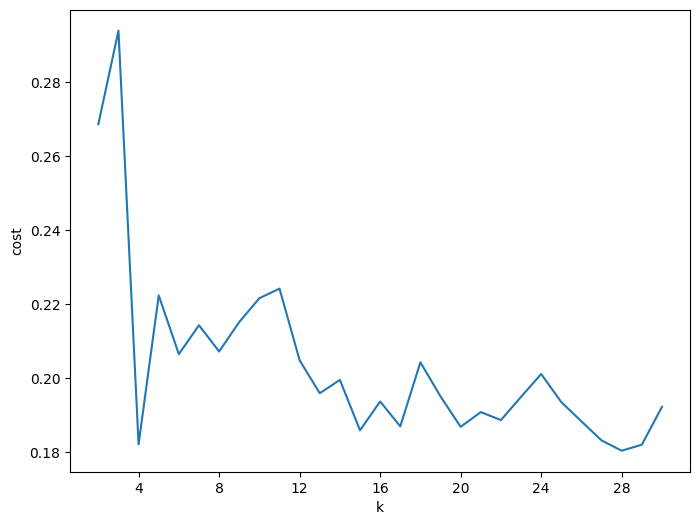

In [ ]:
# import numpy as np

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,31),costArr[1:30])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
costArr # costArr[0] -> k = 1

array([0.        , 0.26856258, 0.29379896, 0.18213042, 0.22233635,
       0.20648929, 0.21428809, 0.20720551, 0.21514597, 0.22158068,
       0.22418005, 0.20482137, 0.19593437, 0.19953136, 0.18592292,
       0.19370424, 0.18699597, 0.2042855 , 0.19505218, 0.18686329,
       0.19083613, 0.18868456, 0.19496377, 0.201122  , 0.1935281 ,
       0.18834118, 0.18319274, 0.18041357, 0.18204311, 0.19224677])

In [ ]:
K = 12

In [ ]:
kmeans = KMeans(featuresCol="features_std")\
            .setK(K)\
            .setSeed(1)

In [ ]:
kmeansPipeline = Pipeline(stages=[indexer, assembler, stdScaler, kmeans])
model = kmeansPipeline.fit(df)
prediction = model.transform(df)

In [ ]:
# model = kmeans.fit(stdScaledData)

In [ ]:
# prediction = model.transform(stdScaledData)

In [ ]:
prediction.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 6713|
|         6|15235|
|         3| 9632|
|         5|15468|
|         9| 9680|
|         4|10592|
|         8|13926|
|         7| 8112|
|        10| 9258|
|        11|14296|
|         2|14694|
|         0| 4047|
+----------+-----+



In [ ]:
centers = model.stages[-1].clusterCenters()
centers

[array([-0.33840731, -0.03128822,  0.75215056, -0.88958743, -0.5112104 ,
         0.62803143, -1.26057664,  4.85542667, -0.31709709,  0.03445626,
        -0.14101078,  0.01302079,  1.52084109, -0.44199923]),
 array([ 0.396544  , -0.18491602, -0.40316366,  0.50523757, -0.15627292,
         3.05743868,  0.2111703 , -0.02935899,  0.08879985, -0.04949647,
         0.09749622, -0.00552896, -0.27455004, -0.27591746]),
 array([-0.04161449, -0.70547171,  0.54166593,  0.68543415, -0.36715316,
        -0.25932624,  0.53311593, -0.2662082 ,  0.05215222,  0.68114181,
         0.43448542, -1.02772414, -0.31603101, -0.30529273]),
 array([-0.3831894 ,  0.98233227, -0.03869498, -0.62176609,  2.12053599,
        -0.17154935, -0.59213133, -0.17411255, -0.03429508,  0.35478331,
        -0.01855874, -0.00260009, -0.31350096, -0.19260249]),
 array([-0.07372965,  0.60297334, -0.05758153, -0.53941066, -0.34925627,
        -0.17613135, -0.20400622, -0.20920612, -0.10386801, -0.08571861,
        -1.55206794,  

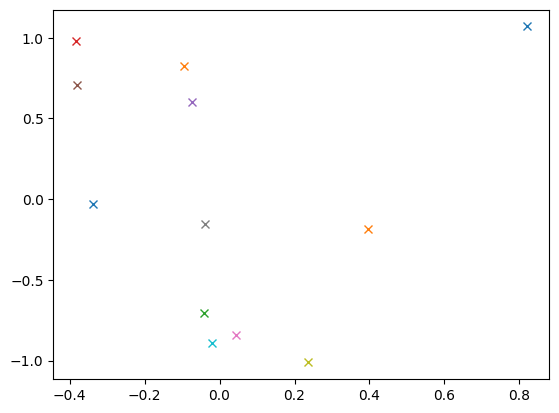

In [ ]:
for k in range(0, K):
    plt.plot(centers[k][0],centers[k][1],'x')

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator(featuresCol="features_std")
cost = evaluator.evaluate(prediction)
print(cost)

0.18411851494048825


In [ ]:
model.save("./kmeans_model")

In [ ]:
prediction.show(5)

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+-------------+--------------------+--------------------+----------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability| energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|artists_index|            features|        features_std|prediction|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+-------------+--------------------+--------------------+----------+
|2yIK9GgvS0MOENRTP...|"""Hooray For Lov...|['Judy Garland', ...|   293067.0|     1/14/64|1964|       0.626|         0.5|  0.361|        

In [ ]:
prediction.select([col for col in prediction.columns if col != 'features' and col != 'features_std']).write.save(path='prediction_kmeans',
                                                                             format='com.databricks.spark.csv',
                                                                             header='true',
                                                                             mode='overwrite')

## recommendation system

In [ ]:
file='/content/drive/My Drive/spotify/spotify-data.csv'

pred_df = sqlContext.read.load(file,
                          format='com.databricks.spark.csv',
                          header='true',inferSchema='true')

In [ ]:
from pyspark.sql.types import DoubleType, IntegerType

toCastedCol = ["duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key", "popularity", "explicit"]
for col in toCastedCol:
  pred_df = pred_df.withColumn(col, pred_df[col].cast(DoubleType()))

pred_df = pred_df.withColumn("year", pred_df["year"].cast(IntegerType()))

In [ ]:
pred_indexer = StringIndexer(inputCol="artists", outputCol="artists_index")

# Assemble feature vector
assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features")
assembler.setHandleInvalid("skip")

stdScaler = StandardScaler(inputCol="features", outputCol="features_std", withStd=True, withMean=True)

In [ ]:
asmPipeline = Pipeline(stages=[pred_indexer, assembler])
stdPipeline = Pipeline(stages=[stdScaler])

In [ ]:
assembled = asmPipeline.fit(pred_df).transform(pred_df)
stdScalerModel = stdPipeline.fit(assembled)
stdScaledData = stdScalerModel.transform(assembled)

In [ ]:
from pyspark.sql.functions import col, array, lit, array_contains
from pyspark.ml.linalg import Vectors
import numpy as np
from scipy.spatial.distance import cdist
from collections import defaultdict

In [ ]:
def get_song_by_id(song_id, df):
    song_df = df.filter(col("id") == song_id)
    if song_df.count() > 0:
        return song_df.first()
    else:
        return None

In [ ]:
def get_mean_vector(song_list, df):
    song_vectors = []
    for song_id in song_list:
        song_data = get_song_by_id(song_id, stdScaledData)
        if song_data is None:
            print(f'Warning: Song ID {song_id} does not exist in Spotify or in database')
            continue
        song_vector = np.array(song_data["features_std"].toArray())
        song_vectors.append(song_vector)
    if not song_vectors:
        return None
    song_matrix = np.array(song_vectors)
    return np.mean(song_matrix, axis=0)

In [ ]:
def flatten_dict_list(dict_list):
    flattened_dict = defaultdict(list)
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
    return flattened_dict

In [ ]:

def recommend_songs(song_list, df, n_songs=10):
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list([{"id": song_id} for song_id in song_list])

    song_center = get_mean_vector(song_list, stdScaledData)
    if song_center is None:
        return []

    scaled_song_center = stdScalerModel.transform(spark.createDataFrame([(Vectors.dense(song_center),)], ["features"])).first()["features_std"]

    scaled_song_center = np.array(scaled_song_center).reshape(1, -1)

    cluster_center = np.argmin(cdist(scaled_song_center, centers, 'cosine'))
    cluster_songs = prediction.filter(col("prediction") == cluster_center).select("id", *metadata_cols, 'features_std').collect()

    # Calculate cosine similarity
    def cosine_similarity(vector1, vector2):
        dot_product = np.dot(vector1, vector2)
        norm1 = np.linalg.norm(vector1)
        norm2 = np.linalg.norm(vector2)
        return float(dot_product / (norm1 * norm2))

    similarities = [(row["id"], row["name"], row["year"], row["artists"], cosine_similarity(np.array(row["features_std"]), scaled_song_center[0])) for row in cluster_songs]
    sorted_similarities = sorted(similarities, key=lambda x: -x[4])

    rec_songs = [row for row in sorted_similarities if row[0] not in song_dict['id']][:n_songs]
    rec_songs_casted = [(row[0], row[1], row[2], row[3], float(row[4])) for row in rec_songs]

    rec_songs_df = spark.createDataFrame(rec_songs_casted, ["id", "name", "year", "artists", "similarity"])

    return rec_songs_df.select("id", *metadata_cols, 'similarity').collect()

## Run System

In [ ]:
song_list = ['4WQk1ivjM6rphaG8ZDc962', '2Fm8QdRzWXWjscoOqXvffN', '37WQ7WJ6FpU0qw4CLNn3Qj']  # Replace with actual song IDs from your dataset
recommended_songs = recommend_songs(song_list, stdScaledData, n_songs=10)

In [ ]:
recommended_songs

[Row(id='2depzNvnAgMFKYnm3moXIc', name='Kno The Meaning', year=2015, artists="['Future']", similarity=0.9665225456251815),
 Row(id='5ka9tzfUYOsFAz6cSUvFX6', name='My Niggas', year=1998, artists="['DMX']", similarity=0.9633320215768506),
 Row(id='0BVXmJ0LW75WTqu82nxkuM', name='Moment In Time', year=1995, artists="['The Pharcyde']", similarity=0.9619450008923246),
 Row(id='2pod1OYOrNtZmKbEuy1CD0', name='One Time 4 Your Mind', year=1994, artists="['Nas']", similarity=0.9591429631952998),
 Row(id='5evSAk9q0l3TfF5dYDwDBO', name='Sauce It Up', year=2017, artists="['Lil Uzi Vert']", similarity=0.9572529423233114),
 Row(id='5jQYkYhoOlBW4vJ2l4TCxl', name='Blockbuster Night, Pt. 1', year=2014, artists="['Run The Jewels']", similarity=0.9570581910413009),
 Row(id='5i8AHhRU9tfp8c3drQetaa', name='Up the River', year=2020, artists="['Future']", similarity=0.955071874016735),
 Row(id='5GseQckHgP7uWyaiCd5ZW3', name='Lifestylez Ov Da Poor & Dangerous', year=1995, artists="['Big L']", similarity=0.95339

In [ ]:
spark.stop()